# Advanced monitor data manipulation and visualization

In the previous [tutorial](https://www.flexcompute.com/tidy3d/examples/notebooks/VizData/), we have demonstrated the basics of data manipulation and visualization. As discussed, in `Tidy3D`, we represent multi-dimensional data (such as arrays) using [xarray.DataArray](https://docs.xarray.dev/en/stable/generated/xarray.DataArray.html#xarray.DataArray) objects. It's important to note that the [xarray](https://docs.xarray.dev/en/stable/generated/xarray.DataArray.html#xarray.DataArray) package provides a lot of functionalities that can greatly simplify our data postprocessing and visualization when used appropriately. 

In this tutorial, we will first briefly review some basic [xarray](https://docs.xarray.dev/en/stable/generated/xarray.DataArray.html#xarray.DataArray) features and then delve into some advanced features such as performing interpolation and integration. This tutorial is designed for users who are already familiar with `Tidy3D`'s basic workflow and would like to learn more about data manipulation and visualization. If you are very new to `Tidy3D`, we suggest checking out the [quick start](https://www.flexcompute.com/tidy3d/examples/notebooks/StartHere/), the [first walkthrough](https://www.flexcompute.com/tidy3d/examples/notebooks/Simulation/), and the [working principles](https://www.flexcompute.com/tidy3d/examples/notebooks/Primer/) tutorials first.

It's important to note that the `xarray` library contains many more functionalities that are not demonstrated here. We encourage users to reference the [documentation](https://docs.xarray.dev/en/stable/api.html) to see what is possible. We also recommend users to watch the [introduction video](https://www.youtube.com/watch?v=mecN-Ph_-78) on `xarray` if you would like to learn more about it. After overcoming the initial learning curve, our users all find data manipulation with `xarray` to be extremely flexible and efficient. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tidy3d as td
from tidy3d import web

## Load Simulation Data 

Since this tutorial is focused on data analysis, we will skip the simulation setup part and only load the simulation result from a previously obtained hdf5 file. We load the hdf5 file to a variable `sim_data` using the `from_hdf5` method of [SimulationData](../_autosummary/tidy3d.SimulationData.html). This is completely analogous to the situation where you just finished running a simulation.

In [2]:
sim_data = td.SimulationData.from_hdf5("misc/mmi_simulation_data.h5")

The loaded data contains two parts: `simulation` and `monitor_data`. `simulation` is simply the original [Simulation](../_autosummary/tidy3d.Simulation.html). We can use it to visualize the simulation in 3D for example.

As we can see, this simulation contains a 1 by 2 MMI power splitter.

In [3]:
sim_data.simulation.plot_3d()

`monitor_data`, as the name suggests, contains data from all monitors defined in the simulation. `monitor_data` is a dictionary with the keys being the names of the monitors. Let's print out the keys to see what they are. 

Here we have three monitors named `Flux monitor`, `Mode monitor`, and `Field monitor`. In the following sections, we will examine them individually and use them to demonstrate various functionalities of `xarray`.

In [4]:
sim_data.monitor_data.keys()

dict_keys(['Flux monitor', 'Mode monitor', 'Field monitor'])

## FluxMonitor Data

We can access the data for each monitor by indexing into the [SimulationData](../_autosummary/tidy3d.SimulationData.html) with the monitor `.name`. The monitor dataset contains one or more `xarray.DataArray` objects storing the actual raw data. For the flux monitor data, we can access the raw flux data as a function of frequency with `.flux`. As most data are multidimensional, it's often very helpful to print out the data and directly inspect its structure. 

Here we can see that the flux is an array with only one coordinate `f`, which is frequency in Hz. The unit of flux is W.

In [5]:
sim_data["Flux monitor"].flux

<xarray.FluxDataArray (f: 50)>
array([0.49619535, 0.4959998 , 0.4958456 , 0.49578664, 0.4958678 ,
       0.49604478, 0.49626908, 0.49647027, 0.4966077 , 0.49661922,
       0.49642277, 0.49594647, 0.4951819 , 0.4942104 , 0.4932421 ,
       0.4924945 , 0.4921227 , 0.49211392, 0.49230942, 0.4924388 ,
       0.49224442, 0.49157965, 0.4904679 , 0.48906133, 0.4876103 ,
       0.48636082, 0.4854779 , 0.4849979 , 0.48482403, 0.48475057,
       0.48453504, 0.48398182, 0.48302355, 0.48175392, 0.48037806,
       0.47914445, 0.47820777, 0.47757253, 0.47708204, 0.47651216,
       0.47562975, 0.47437435, 0.4728097 , 0.47111368, 0.4695425 ,
       0.46828848, 0.4674291 , 0.4669524 , 0.46673352, 0.46655577],
      dtype=float32)
Coordinates:
  * f        (f) float64 1.999e+14 1.996e+14 1.993e+14 ... 1.876e+14 1.874e+14
Attributes:
    units:      W
    long_name:  flux

The data array has `.values` and `.coords`. The `.values` are just the raw, unlabelled data. The `.coords` are a dictionary mapping each dimension of the data to a set of data. For example, mapping the flux values to a specific frequency. We can inspect them by printing them out.

In [6]:
sim_data["Flux monitor"].flux.values

array([0.49619535, 0.4959998 , 0.4958456 , 0.49578664, 0.4958678 ,
       0.49604478, 0.49626908, 0.49647027, 0.4966077 , 0.49661922,
       0.49642277, 0.49594647, 0.4951819 , 0.4942104 , 0.4932421 ,
       0.4924945 , 0.4921227 , 0.49211392, 0.49230942, 0.4924388 ,
       0.49224442, 0.49157965, 0.4904679 , 0.48906133, 0.4876103 ,
       0.48636082, 0.4854779 , 0.4849979 , 0.48482403, 0.48475057,
       0.48453504, 0.48398182, 0.48302355, 0.48175392, 0.48037806,
       0.47914445, 0.47820777, 0.47757253, 0.47708204, 0.47651216,
       0.47562975, 0.47437435, 0.4728097 , 0.47111368, 0.4695425 ,
       0.46828848, 0.4674291 , 0.4669524 , 0.46673352, 0.46655577],
      dtype=float32)

In [7]:
sim_data["Flux monitor"].flux.coords

Coordinates:
  * f        (f) float64 1.999e+14 1.996e+14 1.993e+14 ... 1.876e+14 1.874e+14

`xarray` allows us to quickly plot the data. In this case, the plot will just be a 1D line since the data only contains one coordinate. Note that the x and y axis labels are automatically created accordingly.

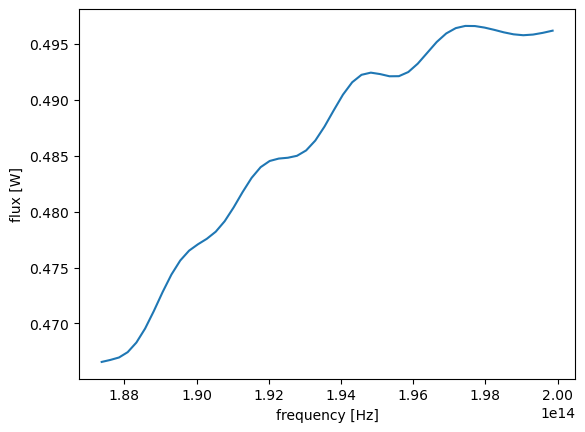

In [8]:
sim_data["Flux monitor"].flux.plot()
plt.show()

In many cases, we would like to customize the plot. For example, the transmission is often plotted in dB scale. Instead of frequency in Hz as the x axis, wavelength in micron is more standard. In addition, we might want to plot the curve in a certain style. This can be achieved by first extracting the data from the DataArray and manually plotting them using [matplotlib](https://matplotlib.org/) or other visualization library of choice. 

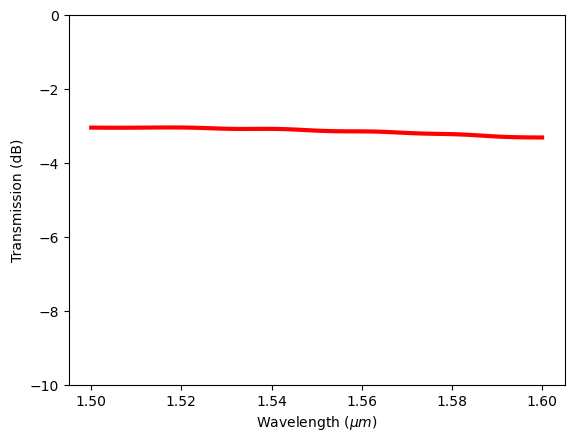

In [9]:
# extract frequecies from the monitor data
freqs = sim_data["Flux monitor"].flux.f

# extract the transmission flux from the monitor data
T = sim_data["Flux monitor"].flux

# plot the transmission in dB
plt.plot(td.C_0 / freqs, 10 * np.log10(T), "red", linewidth=3)
plt.xlabel("Wavelength ($\mu m$)")
plt.ylabel("Transmission (dB)")
plt.ylim(-10, 0)
plt.show()

### Saving Data as a CSV File

After running a simulation, often we want to save the data for future use to avoid rerunning the same simulation. In Tidy3D, after a simulation is finished, the hdf5 data file will be automatically downloaded to the specified path. We can load it in the future as demonstrated at the beginning of this notebook. 

Sometimes users might prefer to only save certain data in other formats such as csv files. Here we demonstrate how to save the transmission flux spectrum. First we define a `numpy` array to store the data and then use the `savetxt` method to save it as a csv file. This csv file will contain two columns with the first column being the frequencies and the second column being the flux. 

In [10]:
flux_data = np.zeros((len(freqs), 2))
flux_data[:, 0] = sim_data["Flux monitor"].flux.f
flux_data[:, 1] = sim_data["Flux monitor"].flux
np.savetxt("data/flux_data.csv", flux_data, delimiter=",")

## ModeMonitor Data

The mode monitor data contains the complex effective indices and the complex mode amplitudes at the monitor position calculated by mode decomposition. First, let's look at the data structure of the complex effective indices `n_complex`. This data contains two coordinates: `f` and `mode_index`, both of which are specified when defining the [ModeMonitor](../_autosummary/tidy3d.ModeMonitor.html) in the simulation. In this case specifically, we solved for 3 modes at 50 frequency points for this monitor.

In [11]:
sim_data["Mode monitor"].n_complex

<xarray.ModeIndexDataArray (f: 50, mode_index: 3)>
array([[2.489277 +0.j, 1.8951759+0.j, 1.5556417+0.j],
       [2.4872196+0.j, 1.8923448+0.j, 1.5539825+0.j],
       [2.4851615+0.j, 1.8895283+0.j, 1.5523468+0.j],
       [2.4831038+0.j, 1.8867241+0.j, 1.55074  +0.j],
       [2.4810426+0.j, 1.8839306+0.j, 1.5491359+0.j],
       [2.4789817+0.j, 1.8811514+0.j, 1.547556 +0.j],
       [2.47692  +0.j, 1.8783836+0.j, 1.5459919+0.j],
       [2.4748576+0.j, 1.8756295+0.j, 1.5444443+0.j],
       [2.4727929+0.j, 1.8728877+0.j, 1.5429138+0.j],
       [2.4707265+0.j, 1.8701544+0.j, 1.5414042+0.j],
       [2.4686599+0.j, 1.8674368+0.j, 1.5399053+0.j],
       [2.4665923+0.j, 1.8647317+0.j, 1.5384263+0.j],
       [2.464523 +0.j, 1.8620384+0.j, 1.5369555+0.j],
       [2.4624531+0.j, 1.8593596+0.j, 1.5355088+0.j],
       [2.4603822+0.j, 1.8566914+0.j, 1.5340687+0.j],
       [2.4583097+0.j, 1.8540373+0.j, 1.5326532+0.j],
       [2.4562361+0.j, 1.8513958+0.j, 1.5312481+0.j],
       [2.454162 +0.j, 1.8487672+0.j, 1.5298533+0.j],
       [2.4520867+0.j, 1.8461518+0.j, 1.52848  +0.j],
       [2.4500098+0.j, 1.8435477+0.j, 1.5271199+0.j],
...
       [2.427097 +0.j, 1.8157864+0.j, 1.5130032+0.j],
       [2.4250083+0.j, 1.813344 +0.j, 1.5117941+0.j],
       [2.422919 +0.j, 1.8109143+0.j, 1.5105985+0.j],
       [2.4208276+0.j, 1.8084954+0.j, 1.5094122+0.j],
       [2.4187353+0.j, 1.8060918+0.j, 1.5082369+0.j],
       [2.4166415+0.j, 1.8037016+0.j, 1.5070716+0.j],
       [2.4145486+0.j, 1.8013238+0.j, 1.5059186+0.j],
       [2.4124515+0.j, 1.7989601+0.j, 1.5047785+0.j],
       [2.4103568+0.j, 1.7966118+0.j, 1.5036418+0.j],
       [2.408259 +0.j, 1.7942752+0.j, 1.5025188+0.j],
       [2.4061618+0.j, 1.7919525+0.j, 1.5014069+0.j],
       [2.4040608+0.j, 1.78964  +0.j, 1.5003092+0.j],
       [2.4019625+0.j, 1.7873462+0.j, 1.4992143+0.j],
       [2.3998604+0.j, 1.785063 +0.j, 1.4981284+0.j],
       [2.3977578+0.j, 1.7827923+0.j, 1.4970543+0.j],
       [2.3956566+0.j, 1.7805377+0.j, 1.4959886+0.j],
       [2.3935518+0.j, 1.7782943+0.j, 1.4949344+0.j],
       [2.3914475+0.j, 1.7760681+0.j, 1.4938891+0.j],
       [2.3893406+0.j, 1.7738496+0.j, 1.4928495+0.j],
       [2.387236 +0.j, 1.7716507+0.j, 1.4918177+0.j]], dtype=complex64)
Coordinates:
  * f           (f) float64 1.999e+14 1.996e+14 ... 1.876e+14 1.874e+14
  * mode_index  (mode_index) int64 0 1 2
Attributes:
    long_name:  Propagation index

### Data Selection/Slicing

For multidimensional data, it's important to slice them correctly to extract the data that we are looking for. For example, assume that we want to plot the effective indices as a function of frequency for each mode. This can be easily achieved by using the [sel](https://docs.xarray.dev/en/v2022.03.0/generated/xarray.Dataset.isel.html) method of `xarray`. 

After slicing the data, we can directly plot it on a `matplotlib` axis so we can style the plot after plotting it. 

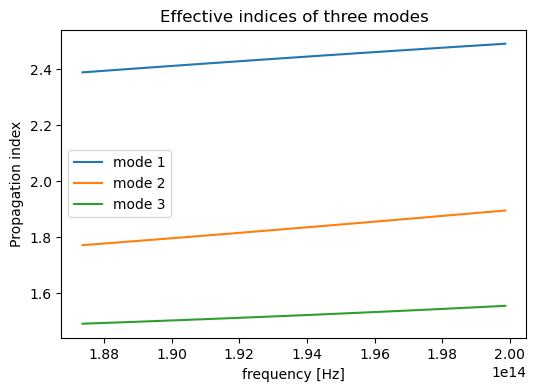

In [12]:
# define a matplotlib axis
fig, ax = plt.subplots(figsize=(6, 4))

# slice the monitor data and plot it on the axis
sim_data["Mode monitor"].n_complex.sel(mode_index=0).real.plot(ax=ax)
sim_data["Mode monitor"].n_complex.sel(mode_index=1).real.plot(ax=ax)
sim_data["Mode monitor"].n_complex.sel(mode_index=2).real.plot(ax=ax)

# style the plot
ax.set_title("Effective indices of three modes")
ax.legend(["mode 1", "mode 2", "mode 3"])
plt.show()

In `sel`, we can specify multiple coordinates at the same time. For example, we want to extract the effective index of the first mode (index 0) at the highest frequency. 

In [13]:
n_eff = sim_data["Mode monitor"].n_complex.sel(mode_index=0, f=freqs[0]).real.values

print(
    f"The effective index for the first mode at {1e3*td.C_0/freqs.values[0]:.3f} nm is {n_eff:.3f}."
)

The effective index for the first mode at 1500.000 nm is 2.489.


Equivalently, the same can be achieved by using [isel](https://docs.xarray.dev/en/v2022.03.0/generated/xarray.Dataset.isel.html), which stands for index selection. Unlike `sel`, which selects at specific coordinate values, `isel` selects at specific coordinate index. For example, the highest frequency is the index 0 of the frequency coordinate. Therefore, `isel(mode_index=0, f=0)` will give the same result as `sel(mode_index=0, f=freqs[0])`.

In [14]:
n_eff = sim_data["Mode monitor"].n_complex.isel(mode_index=0, f=0).real.values
print(
    f"The effective index for the first mode at {1e3*td.C_0/freqs.values[0]:.3f} nm is {n_eff:.3f}."
)

The effective index for the first mode at 1500.000 nm is 2.489.


Besides the effective index, [ModeMonitor](../_autosummary/tidy3d.ModeMonitor.html) is primarily used to calculate the transmission of certain modes in certain directions. We can extract the complex amplitude and square it to compute the mode transmission power. 

In addition to the support of standard mathematical operations (`+`, `-`, `*`, `**`), `xarray` is also compatible with [numpy](https://numpy.org/) so we can directly apply `numpy` operations such as `square` to an `xarray` DataArray. As a demonstration, we extract the transmission of the fundamental mode in the positive direction (`sel(mode_index=0, direction='+')`), take the absolute value (`.abs`), and square it using `numpy`. Then we can plot it in dB scale. The plot is similar to the previous plot from `Flux monitor`, which is expected as the waveguide is single mode and most of the transmitted power is at the fundamental mode.

Note that in Tidy3D, we implemented additional convenient functionalities that are not avaiable in the origianl `xarray`. Taking the absolute value (`.abs`) is one example. One can achieve the same result by using `abs()` on an DataArray. 

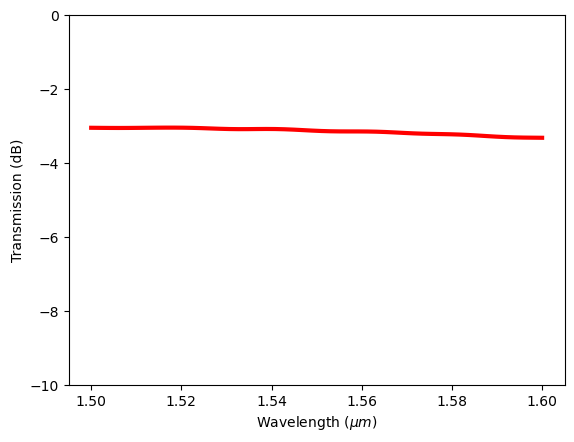

In [15]:
# extract complex mode amplitude and calculate transmission power
T = np.square(sim_data["Mode monitor"].amps.sel(mode_index=0, direction="+").abs)

# plot the transmission spectrum
plt.plot(td.C_0 / freqs, 10 * np.log10(T), "red", linewidth=3)
plt.xlabel("Wavelength ($\mu m$)")
plt.ylabel("Transmission (dB)")
plt.ylim(-10, 0)
plt.show()

## FieldMonitor Data

Finally let's examine the data in `Field monitor`. This dataset contains all electric and magnetic field components: `Ex`, `Ey`, `Ez`, `Hx`, `Hy`, and `Hz`. Let's use `Hz` as an example to explore some visualization possibilities. 

This array has 4 coordinates: three spatial coordinates and one frequency coordinate.  

In [16]:
sim_data["Field monitor"].Hz

<xarray.ScalarFieldDataArray (x: 639, y: 71, z: 4, f: 3)>
array([[[[-4.21197501e-13-7.63092253e-14j,
           2.06759574e-14+1.06486902e-13j,
          -5.45012169e-13+1.84023478e-13j],
         [ 1.72903887e-13+7.30291817e-14j,
           6.28276050e-14-2.33233300e-13j,
           1.06661121e-12-1.47368811e-13j],
         [-1.45802099e-13-9.70202583e-14j,
          -6.83223077e-14+1.50096800e-13j,
          -1.01692168e-12+1.69137138e-13j],
         [-1.66980999e-13-4.46525378e-14j,
          -6.44609081e-14+1.04707238e-13j,
          -7.64654182e-13+1.56975561e-13j]],

        [[ 1.83680789e-14-6.91012189e-13j,
           1.55601953e-12+9.88327367e-13j,
          -2.74072670e-12+1.58785116e-12j],
         [ 7.05131808e-13-8.20385426e-13j,
           8.60337897e-13+5.32298543e-13j,
          -2.65417007e-12-9.85616970e-13j],
         [ 5.99199238e-13-7.92176383e-13j,
...
          -3.72196550e-13+1.77992034e-13j],
         [ 1.17384121e-14-1.41757672e-13j,
           1.57059980e-13+2.16227996e-13j,
           4.11576616e-13-1.58133448e-13j],
         [ 2.44148692e-14-1.44831968e-13j,
           1.07231030e-13+1.80186378e-13j,
           2.91607043e-13-1.04423543e-13j]],

        [[ 5.06348842e-14-4.29277484e-14j,
           1.18457295e-14+9.13331910e-14j,
           1.09568807e-13-7.53448004e-14j],
         [-4.63693618e-14+4.68727399e-14j,
          -1.57478841e-14-1.07168458e-13j,
          -1.38530151e-13+8.91796877e-14j],
         [ 4.53232422e-14-8.81930501e-14j,
           1.54002956e-14+1.45535100e-13j,
           1.25600878e-13-6.35340440e-14j],
         [ 3.75325754e-14-6.70172400e-14j,
           9.84553236e-15+1.09919554e-13j,
           1.00585596e-13-5.27222749e-14j]]]], dtype=complex64)
Coordinates:
  * x        (x) float64 -28.33 -28.24 -28.16 -28.07 ... 28.11 28.2 28.29 28.33
  * y        (y) float64 -4.203 -3.996 -3.789 -3.583 ... 3.583 3.789 3.996 4.203
  * z        (z) float64 -0.11 -0.022 0.066 0.11
  * f        (f) float64 1.999e+14 1.934e+14 1.874e+14
Attributes:
    long_name:  field value

We can slice the data in the same way using `sel` and(or) `isel`. Let's look at the `Hz` field at the first frequency (1500 nm) and z=0 plane. When using `sel`, it's important to note that the specific coordinate value might not be available in the data. For example, the z coordinate contains four values, namely -0.11, -0.022, 0.066, and 0.11. That is, z=0 is not available. We can specify `method='nearest'` in the selection such that it automatically extracts the data at the nearest plane, e.g. z=-0.022.

In [17]:
sim_data["Field monitor"].Hz.isel(f=0).sel(z=0, method="nearest")

<xarray.ScalarFieldDataArray (x: 639, y: 71)>
array([[ 1.72903887e-13+7.30291817e-14j,  7.05131808e-13-8.20385426e-13j,
        -4.10750562e-13-1.32187230e-11j, ...,
         2.20327619e-12+2.00806880e-14j, -2.93731185e-13+3.05212940e-13j,
        -8.45800548e-14+2.77022573e-13j],
       [-2.07527363e-11+9.06220411e-12j,  1.73980080e-10-7.17077953e-10j,
         5.30298161e-09-3.85799659e-09j, ...,
         1.53273738e-09-1.78293558e-09j, -1.13150746e-10-1.01174555e-10j,
         9.96051982e-13+1.79779379e-12j],
       [-1.84707982e-09+2.74981615e-09j, -2.47840379e-08-9.69261080e-08j,
         4.35158171e-07-5.78295271e-07j, ...,
         7.09929466e-08-3.01665466e-07j, -2.05956585e-08-4.81508300e-09j,
         1.10313522e-10+8.91196908e-11j],
       ...,
       [-1.03232742e-10+8.24886166e-12j,  2.28711539e-09-1.38926426e-09j,
         1.25055974e-08+1.50453268e-08j, ...,
         8.53952109e-09+3.09128767e-09j, -1.86159352e-10-5.29092270e-10j,
         9.32336239e-13+7.03187899e-12j],
       [-1.80652870e-13-7.85726803e-14j,  1.38683303e-12-4.83263006e-13j,
         1.98963827e-12+1.07613978e-11j, ...,
         5.02892346e-12+3.87518316e-12j,  5.12411565e-14-1.53012545e-13j,
        -5.88365687e-14+1.36643653e-13j],
       [-5.79908097e-14-4.90087910e-14j, -1.08373292e-13-2.28382634e-13j,
        -1.74725566e-12-1.37564834e-14j, ...,
         6.79223875e-13+7.33959402e-14j, -1.36950667e-14+7.32532185e-14j,
        -4.63693618e-14+4.68727399e-14j]], dtype=complex64)
Coordinates:
  * x        (x) float64 -28.33 -28.24 -28.16 -28.07 ... 28.11 28.2 28.29 28.33
  * y        (y) float64 -4.203 -3.996 -3.789 -3.583 ... 3.583 3.789 3.996 4.203
    z        float64 -0.022
    f        float64 1.999e+14
Attributes:
    long_name:  field value

After slicing, the data is 2D so it can be plotted as a false color plot. When using the `plot` method, we can specify which coordinate is plotted on the horizontal axis, which coordinate is plotted on the vertical axis, what colormap is used, min and max values of the color scale, etc.

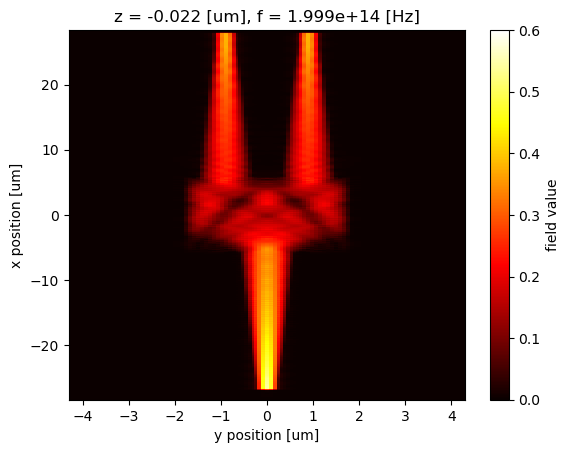

In [18]:
Hz_1500 = sim_data["Field monitor"].Hz.abs.isel(f=0).sel(z=0, method="nearest")
Hz_1500.plot(x="y", y="x", cmap="hot", vmin=0, vmax=0.6)
plt.show()

Similarly, we can easily extract and plot the field at 1550 nm.

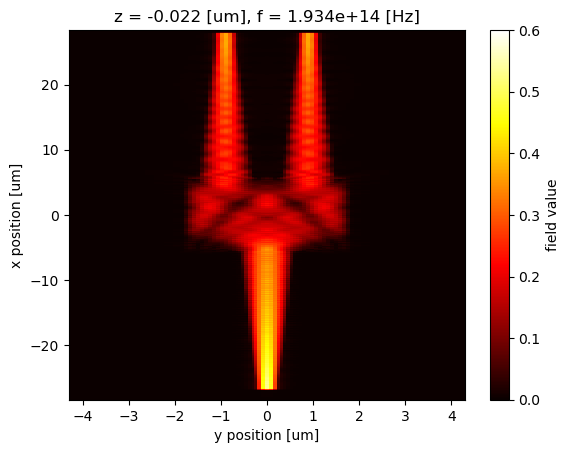

In [19]:
Hz_1550 = sim_data["Field monitor"].Hz.abs.sel(f=td.C_0 / 1.55, z=0, method="nearest")
Hz_1550.plot(x="y", y="x", cmap="hot", vmin=0, vmax=0.6)
plt.show()

### Data Interpolation

The field data are most likely located in a nonlinear grid. However, `xarray` allows us to interpolate data at arbitrary coordinates easily. As a demonstration, we define a linear grid and interpolate the `Hz` field to this grid by using the `interp` method.

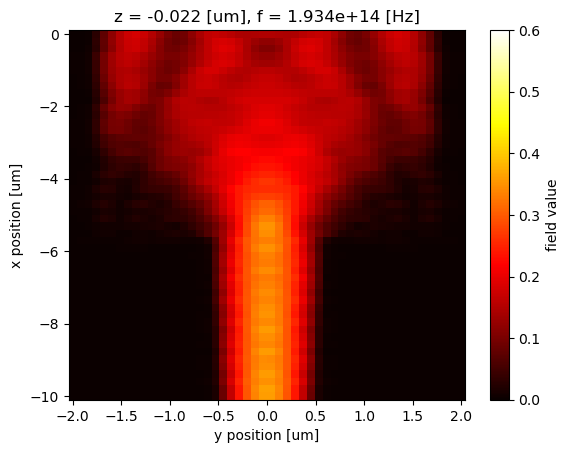

In [20]:
x_interp = np.linspace(-10, 0, 50)
y_interp = np.linspace(-2, 2, 50)

Hz_1550.interp(x=x_interp, y=y_interp).plot(x="y", y="x", cmap="hot", vmin=0, vmax=0.6)
plt.show()

Similarly, we can save the field data as a csv file for future use.

In [21]:
Hz_data = Hz_1550.interp(x=x_interp, y=y_interp).values
np.savetxt("data/field_data.csv", Hz_data, delimiter=",")

## Integration

Sometimes the postprocessing of the simulation data requires the calculation of certain integrals. A common example is the calculation of the overlap integral of two modes. For instance, when designing an [edge coupler](https://www.flexcompute.com/tidy3d/examples/notebooks/EdgeCoupler/), we might want to calculate the overlap integral of the fiber mode and the waveguide mode. In Tidy3D, we provide a convenient function `outer_dot` that does this integral. 

To demonstrate this, we load data from two hdf5 files. They contain the field profiles of a Gaussian mode and a waveguide mode.

In [22]:
waveguide_mode_data = td.ModeSolverData.from_hdf5("misc/waveguide_mode_data.h5")
gaussian_beam_data = td.SimulationData.from_hdf5("misc/gaussian_beam_data.h5")

Before calculating the overlap, let's plot the fields to visualize them.

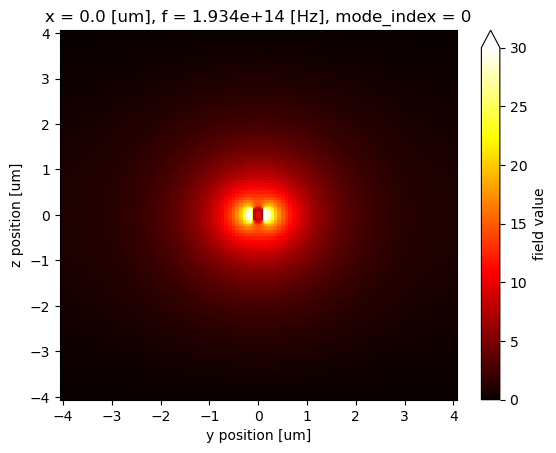

In [23]:
waveguide_mode_data.Ey.abs.isel(f=5).plot(x="y", y="z", vmin=0, vmax=30, cmap="hot")
plt.show()

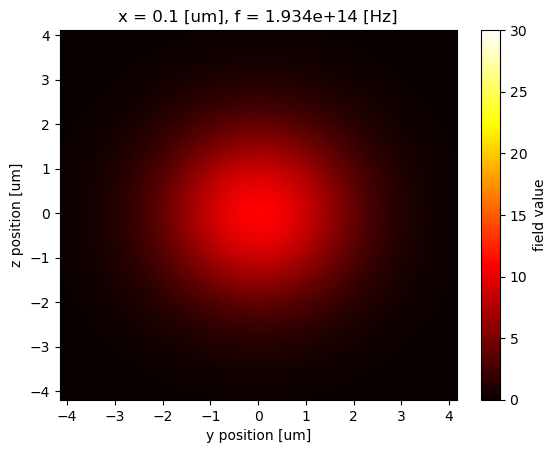

In [24]:
gaussian_beam_data["monitor_0"].Ey.abs.isel(f=5).plot(x="y", y="z", vmin=0, vmax=30, cmap="hot")
plt.show()

From the field profiles, we can see that the waveguide mode and the Gaussian mode have a similar mode area so they should have a significant overlap.

Now we calculate the overlap using `outer_dot` and plot the result in dB. 

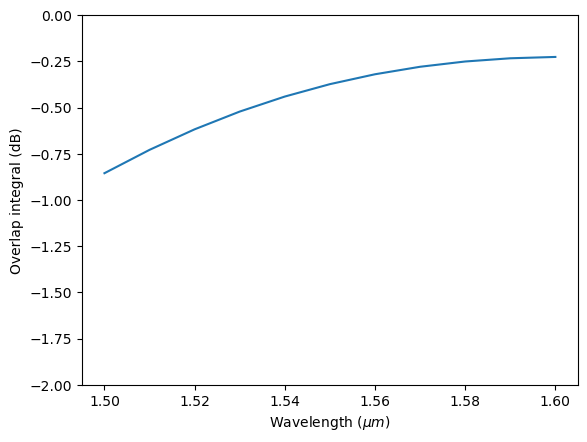

In [25]:
overlap = waveguide_mode_data.outer_dot(gaussian_beam_data["monitor_0"])
plt.plot(td.C_0 / overlap.f, 20 * np.log10(np.abs(overlap)))
plt.xlabel("Wavelength ($\mu m$)")
plt.ylabel("Overlap integral (dB)")
plt.ylim(-2, 0)
plt.show()
plt.show()

For demonstration purposes, we can also perform the integral manually using the `integrate` method in `xarray`. The overlap integral is given by 

$$
\frac{1}{4} \left(\mathbf{E}_1 \times \mathbf{H}_2^* - \mathbf{H}_1 \times \mathbf{E}_2^* \right) dA,
$$

where $\mathbf{E}_1$ and $\mathbf{H}_1$ are the electric and magnetic fields of the first mode, $\mathbf{E}_2$ and $\mathbf{H}_2$ are the fields of the second mode, and * denotes complex conjugation.

One complication here is that the fields of the two modes might not share the same grid as they can be calculated from different simulations. The computation between different arrays does require them to share the same coordinates. In this situation, we can use the `interp_like` method to easily interpolate one array to the grid of the other array.

As expected, the result calculated this way is the same as that calculated from `outer_dot` above.

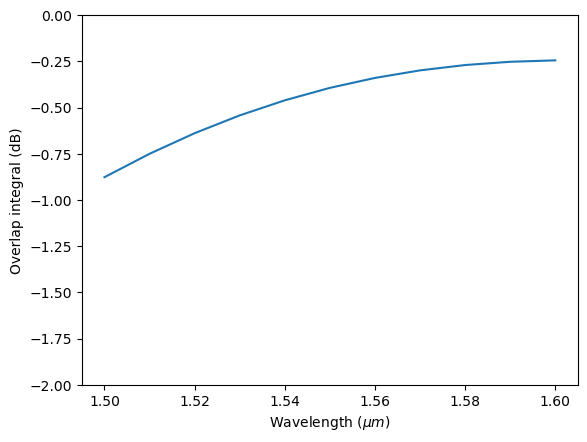

In [26]:
Ey_wg = waveguide_mode_data.Ey.squeeze(drop=True)
Ez_wg = waveguide_mode_data.Ez.squeeze(drop=True)
Hy_wg = waveguide_mode_data.Hy.squeeze(drop=True)
Hz_wg = waveguide_mode_data.Hz.squeeze(drop=True)

Ey_gauss = gaussian_beam_data["monitor_0"].Ey.interp_like(Ey_wg)
Ez_gauss = gaussian_beam_data["monitor_0"].Ez.interp_like(Ey_wg)
Hy_gauss = gaussian_beam_data["monitor_0"].Hy.interp_like(Ey_wg)
Hz_gauss = gaussian_beam_data["monitor_0"].Hz.interp_like(Ey_wg)

e_self_x_h_other = Ey_wg * Hz_gauss - Ez_wg * Hy_gauss
h_self_x_e_other = Hy_wg * Ez_gauss - Hz_wg * Ey_gauss

integrand = 0.25 * (e_self_x_h_other - h_self_x_e_other)

overlap = integrand.integrate(coord=["y", "z"])

plt.plot(td.C_0 / overlap.f, 20 * np.log10(np.abs(overlap)))
plt.xlabel("Wavelength ($\mu m$)")
plt.ylabel("Overlap integral (dB)")
plt.ylim(-2, 0)
plt.show()
plt.show()

Besides the overlap integral shown above, in other example notebooks we also demonstrated how to perform integrals to calculate the [cavity mode volume](https://www.flexcompute.com/tidy3d/examples/notebooks/CavityFOM/) and the [nonlinear feedback parameter](https://www.flexcompute.com/tidy3d/examples/notebooks/BistablePCCavity/).

## Closing Remarks

In this tutorial, we demonstrated various futures commonly used in Tidy3D's data postprocessing and visualization. We used data from [FieldMonitor](../_autosummary/tidy3d.FieldMonitor.html), [FluxMonitor](../_autosummary/tidy3d.FluxMonitor.html), [ModeMonitor](../_autosummary/tidy3d.ModeMonitor.html), and [ModeSolver](../_autosummary/tidy3d.plugins.mode.ModeSolver.html) as examples. However, the methods are general and equally applicable to data from [DiffractionMonitor](../_autosummary/tidy3d.DiffractionMonitor.html), [FieldProjectionCartesianMonitor](../_autosummary/tidy3d.FieldProjectionCartesianMonitor.html), and so on.